In [1]:
import os
import matplotlib.gridspec as gridspec
import numpy as np
import cv2
from matplotlib import pyplot as plt

## Load dataset

In [2]:
def read_dataset(root: str, img_format: str):
    images = []
    file_names = []
    for file in os.listdir(root):
        title = file.title().lower()
        if title.split('.')[-1] == img_format:
            file_names.append(title)
            images.append(cv2.imread(os.path.join(root, title)))
    return images

In [3]:
def detect_inner_circle(img, canny_param=20, hough_param=20):
    filtered = bottom_hat_median_blurr(img)
    adjusted = adjust_gamma(filtered, 10)
    circles = cv2.HoughCircles(adjusted, cv2.HOUGH_GRADIENT, 1, 20,
                               param1=canny_param,
                               param2=hough_param,
                               minRadius=0)
    inner_circle = [0, 0, 0]
    if circles is not None:
        inner_circle = np.uint16(np.around(circles[0][0])).tolist()
    return inner_circle

In [4]:
def bottom_hat_median_blurr(image):
    #cimg = cv2.cvtColor(cv2.UMat(image), cv2.COLOR_RGB2GRAY)
    cimg = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    blackhat = cv2.morphologyEx(cimg, cv2.MORPH_BLACKHAT, kernel)
    bottom_hat_filtered = cv2.add(blackhat, cimg)
    return cv2.medianBlur(bottom_hat_filtered, 17)


def adjust_gamma(image, gamma=1.0):
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255
                      for i in np.arange(0, 256)]).astype("uint8")
    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)

In [5]:
def plot_images_grid(images, height, width):
    plt.subplots(figsize=(width * 2, height * 2))
    gs = gridspec.GridSpec(height, width)
    gs.update(wspace=0.05, hspace=0.05)
    for i, img in enumerate(images):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(img)

In [6]:
root = r"C:\Users\User\Documents\Dataset eye\Dataset\Preprocessed"

In [7]:
os.path.exists(root)

True

In [8]:
images = read_dataset(root, "jpg")

In [9]:
len(images)

4215

In [10]:
for img in images:
    circle = detect_inner_circle(img)
    cv2.circle(img,(circle[0],circle[1]),circle[2],(0,255,0),2)
    cv2.circle(img,(circle[0],circle[1]),2,(0,255,0),3)

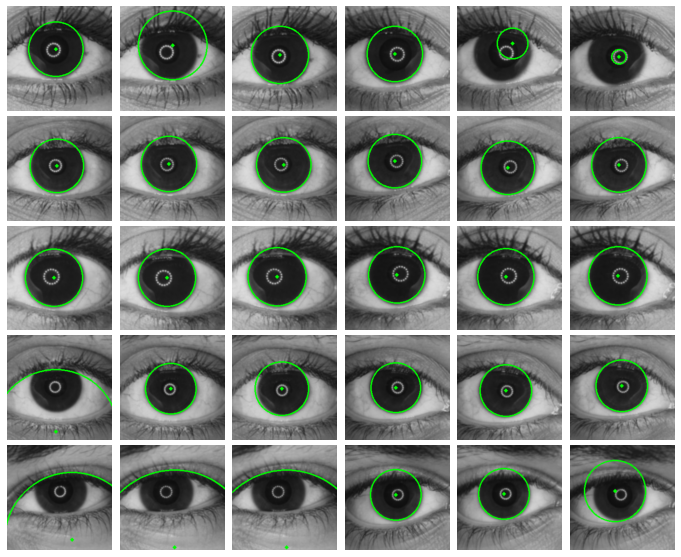

In [11]:
plot_images_grid(images[:30], 5, 6)

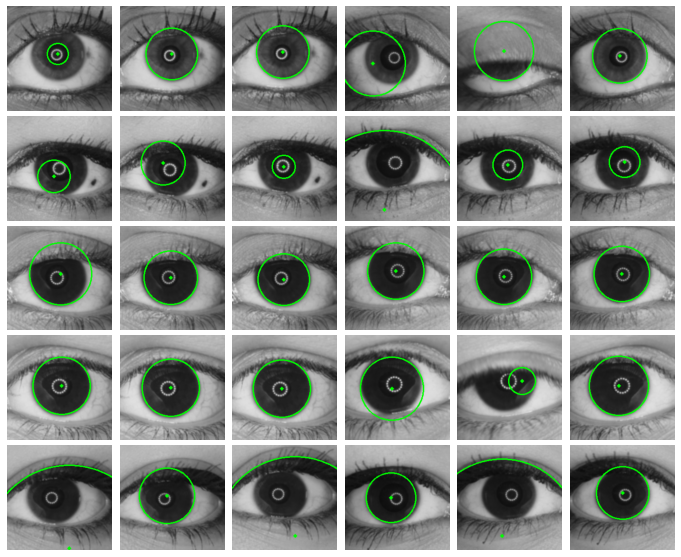

In [12]:
plot_images_grid(images[30:60], 5, 6)

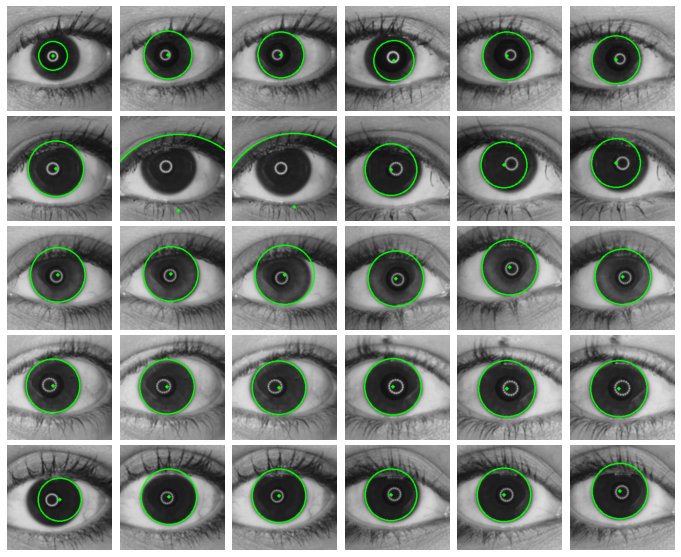

In [13]:
plot_images_grid(images[60:90], 5, 6)